# The Titanic Survival Prediction

## Imports and Data Loading

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing and Preparing x and y

In [3]:
x = df[["Pclass","Sex","Age","Fare"]]
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [4]:
x.describe()

,Pclass,Age,Fare
count,891.000000,714.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,20.125000,7.910400
50%,3.000000,28.000000,14.454200
75%,3.000000,38.000000,31.000000
max,3.000000,80.000000,512.329200


In [5]:
x.shape

(891, 4)

In [6]:
x.Sex.count

<bound method Series.count of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: str>

Age column has some missing values, we have to fill it with suitable value

### Checking the best value to fillna in Age

<Axes: xlabel='Age', ylabel='Count'>

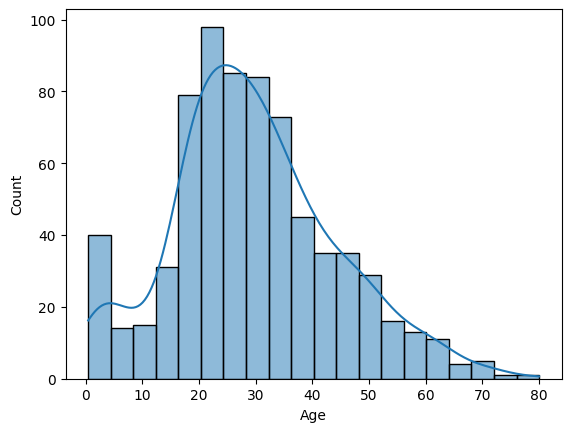

In [7]:
sns.histplot(x.Age, kde=True)

The data is normal, fine to fill with mean

In [8]:
x.Age = x.Age.fillna(x.Age.mean())
x.describe()

,Pclass,Age,Fare
count,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,13.002015,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,7.910400
50%,3.000000,29.699118,14.454200
75%,3.000000,35.000000,31.000000
max,3.000000,80.000000,512.329200


### Encoding the Sex column

In [9]:
y = df.Survived

#encoding Sex with one hot encoder, this is better and using label encoder before it is depricated now
ct = ColumnTransformer([("Sex", OneHotEncoder(drop="first"), [1])], remainder="passthrough")
x = ct.fit_transform(x)
x

array([[ 1.        ,  3.        , 22.        ,  7.25      ],
       [ 0.        ,  1.        , 38.        , 71.2833    ],
       [ 0.        ,  3.        , 26.        ,  7.925     ],
       ...,
       [ 0.        ,  3.        , 29.69911765, 23.45      ],
       [ 1.        ,  1.        , 26.        , 30.        ],
       [ 1.        ,  3.        , 32.        ,  7.75      ]],
      shape=(891, 4))

### Making a dataframe with column names

In [10]:
# to see the column name, i always do the following thing
feature_columns = ct.get_feature_names_out()
features = pd.DataFrame(x, columns=feature_columns)
features.head()

,Sex__Sex_male,remainder__Pclass,remainder__Age,remainder__Fare
0,1.0,3.0,22.0,7.2500
1,0.0,1.0,38.0,71.2833
2,0.0,3.0,26.0,7.9250
3,0.0,1.0,35.0,53.1000
4,1.0,3.0,35.0,8.0500


## Training the model

### Train Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size=0.8)

### Model fitting

In [12]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

### Checking the Score

In [13]:
model.score(x_test, y_test)

0.8324022346368715